In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("people_25_dataset.csv")

first_col = df.columns[0]
df_unchanged = df[[first_col]]

numeric_cols = df.drop(columns=[first_col]).select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler(feature_range=(-2, 2))
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

df_normalized = pd.concat([df_unchanged, df_scaled], axis=1)
print(df_normalized.head())

   Sl No  Weight (kg)  Height (cm)       Age  Salary (INR)
0      1     1.523810    -0.918919 -0.736842     -1.408139
1      2     0.571429     0.162162 -0.421053      1.762505
2      3    -0.761905     0.486486  1.578947      0.248234
3      4     1.904762     0.702703  2.000000     -1.630556
4      5    -1.428571     0.810811 -1.789474      0.183306


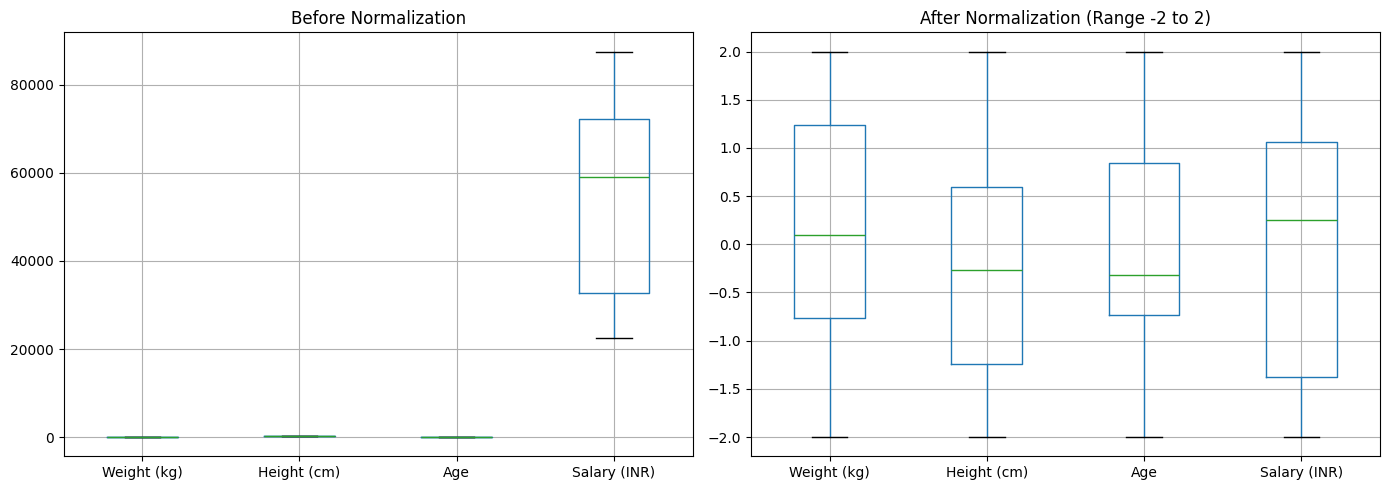

In [ ]:
#visualize before and after normalization using boxplot

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
df[numeric_cols].boxplot()
plt.title("Before Normalization")
plt.xticks()

plt.subplot(1, 2, 2)
df_scaled.boxplot()
plt.title("After Normalization (Range -2 to 2)")
plt.xticks()

plt.tight_layout()
plt.show()

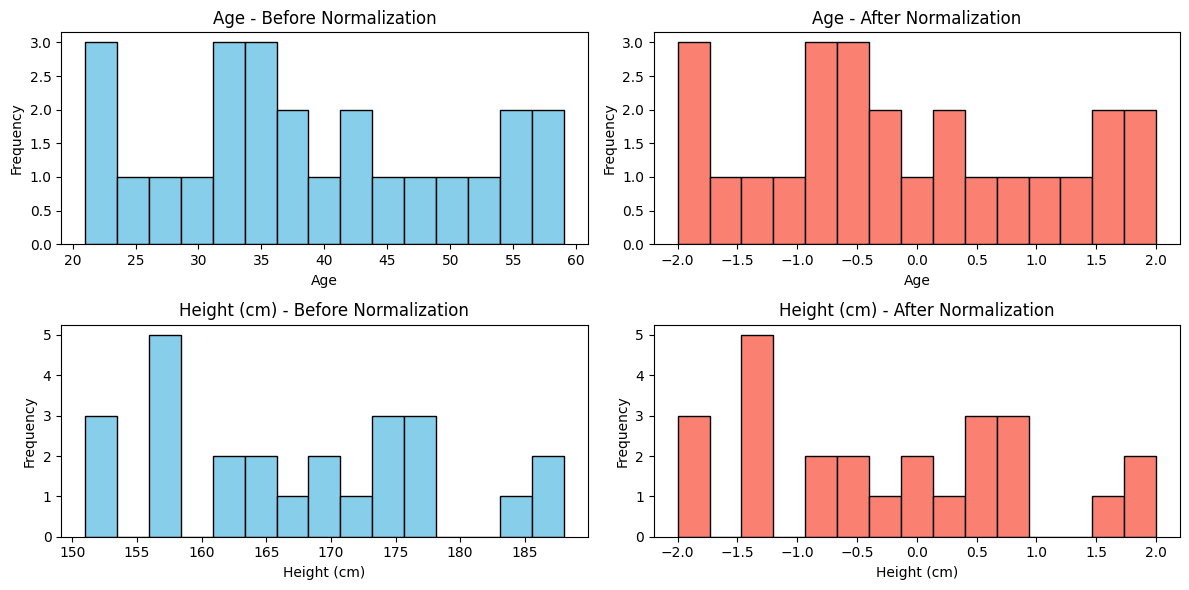

In [ ]:
#visualize the before and after normalizatiion for age and height using histograms

cols= ['Age', 'Height (cm)']

plt.figure(figsize=(12, 6))

for i, col in enumerate(cols):

    plt.subplot(2, 2, 2*i + 1)
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"{col.capitalize()} - Before Normalization")
    plt.xlabel(col)
    plt.ylabel("Frequency")


    plt.subplot(2, 2, 2*i + 2)
    plt.hist(df_scaled[col], bins=15, color='salmon', edgecolor='black')
    plt.title(f"{col.capitalize()} - After Normalization")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()